In [1]:
#### HI CRISSY!!!
# I thought it might be nice to have a space here where we can talk to each other about what we did or should do next.
# We can treat this as like a working checklist of things to do, and to help each other with things we have done.

# This is the basic data, mostly untouched, with a basic model.
# Then I found a simple way to identify categorical data vs continuous. We can discuss which ones are worth keeping.
# At the bottom I created some histograms of the columns for a better visual of categoricals.
# Then I made a heatmap to check for correlation.
# I stole this code from our project so it isn't perfect. I haven't looked into why it cuts off at the top and bottom.

# My idea was to produce a figure with two subplots for each column in data. One regular, one log. For a quick visual comparison.
# I sunk too much time into it and haven't quite gotten it to work yet. Thinking I'll give up. Should have spent this time on productive steps.

# NEXT STEPS:
# Work with NaN values. Didn't want to make a decision without discussing it with you first.
# Use heatmap to identify heavily coordinated columns.
# Figure out which of these are worth discarding and which are categorical and can use get dummies to improve.
# Drop correlated columns, run a second model. Compare R scores.
# Use get dummies on categorical, compare correlation again, keep the good ones.
# Log transform some columns to normalize.
# Model again and compare.
# We need lots of models for this project, so we can make one after every significant step.

# I don't expect you to do all of this tomorrow! Just do what you can, and I'll pick it up where you leave it.
# Good luck!

In [2]:
# Imports

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('kc_house_data.csv')

In [3]:
# Examine

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Move price column to end. Helps with formula creation (data.columns[:-1] is the easiest solution I could find to not including price~price in formula)

data = data[[c for c in data if c not in ['price']] + ['price']]

In [5]:
# 'date' and 'sqft_basement' columns cause a problem with the model.summary() Don't know why. Further research needed.
# id column is clearly not part of the model

data = data.drop(['date','sqft_basement','id'], axis=1)

In [6]:
data.isnull().sum().sum()

6281

In [7]:
count_nan_in_data = data.isnull().sum()
print (count_nan_in_data)

bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64


In [8]:
#Would views or year renovated impact the price unless it was extremely dated? And, there are only two years on the year renovated category, which is limiting. We're thinking not likely, so we're going to remove those columns.  Also, we'd like to explore a way to fill the nan waterfront values but have decided to remove the column for now but may come back to. So we removed these columns and gave the new data frame a name
new_data=data.drop(columns=['yr_renovated', 'view','waterfront'])

In [9]:
# Base model, including all factors *except above*.

formula = 'price ~ '+ '+'.join(data.columns[:-1])
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2174.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:00:30   Log-Likelihood:            -2.1503e+05
No. Observations:               15762   AIC:                         4.301e+05
Df Residuals:                   15744   BIC:                         4.302e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.302e+06   3.48e+06      1.524      0.127   -1.52e+06    1.21e+07
bedrooms       -3.75e+04   2219.565    -16.895      0.000   -4.18e+04   -3.31e+04
bathrooms      4.469e+04   3864.212     11.564      0.000    3.71e+04    5.23e+04
sqft_living     154.5053      5.169     29.892      0.000     144.374     164.637
sqft_lot          0.0939      0.056      1.670      0.095      -0.016       0.204
floors         4029.0029   4268.398      0.944      0.345   -4337.547    1.24e+04
waterfront     6.098e+05   2.05e+04     29.679      0.000     5.7e+05     6.5e+05
view           5.283e+04   2552.740     20.696      0.000    4.78e+04    5.78e+04
condition      2.653e+04   2785.489      9.525      0.000    2.11e+04     3.2e+04
grade          9.375e+04   2570.660     36.470      0.000    8.87e+04    9.88e+04
sqft_above       38.2463      5.138      7.444      0.000      28.175      48.317
yr_built      -2674.2510     85.958    -31.111      0.000   -2842.739   -2505.763
yr_renovated     19.8281      4.368      4.540      0.000      11.267      28.389
zipcode        -571.0855     39.078    -14.614      0.000    -647.682    -494.489
lat             6.04e+05   1.27e+04     47.578      0.000    5.79e+05    6.29e+05
long          -2.174e+05   1.56e+04    -13.964      0.000   -2.48e+05   -1.87e+05
sqft_living15    15.6360      4.109      3.805      0.000       7.581      23.691
sqft_lot15       -0.3382      0.085     -3.998      0.000      -0.504      -0.172
==============================================================================
Omnibus:                    13694.698   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1491014.115
Skew:                           3.668   Prob(JB):                         0.00
Kurtosis:                      50.080   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# To help identify categorical columns

for col in data.columns:
    print(col,'               ', len(data[col].unique()))

bedrooms                 12
bathrooms                 29
sqft_living                 1034
sqft_lot                 9776
floors                 6
waterfront                 3
view                 6
condition                 5
grade                 11
sqft_above                 942
yr_built                 116
yr_renovated                 71
zipcode                 70
lat                 5033
long                 751
sqft_living15                 777
sqft_lot15                 8682
price                 3622


In [11]:
# From eyeballing it.

likelycategorical = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4DDFA7470>,
      dtype=object)

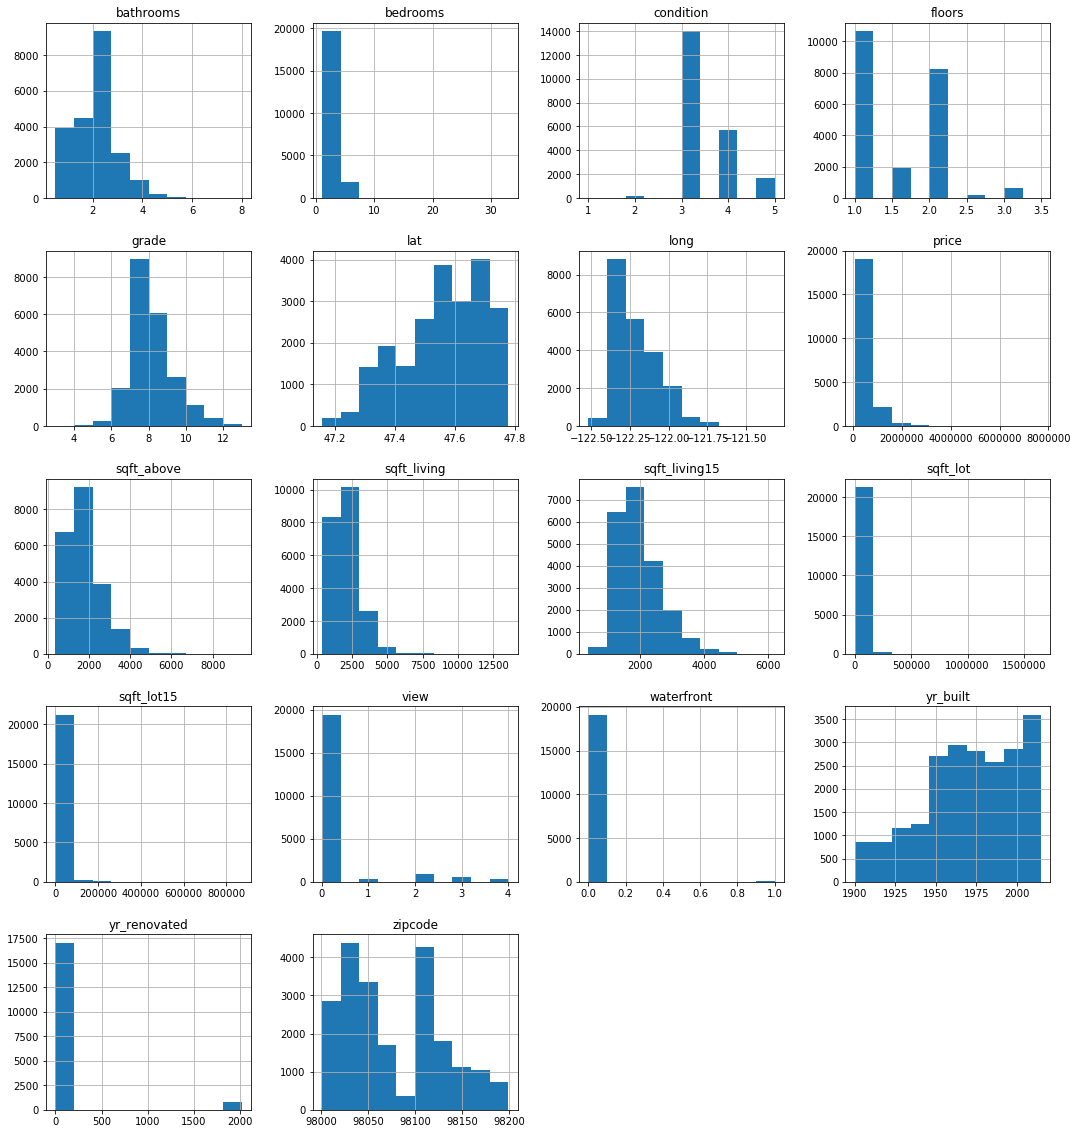

In [12]:
# Better identify categoricals

data.hist(figsize=(18,20))

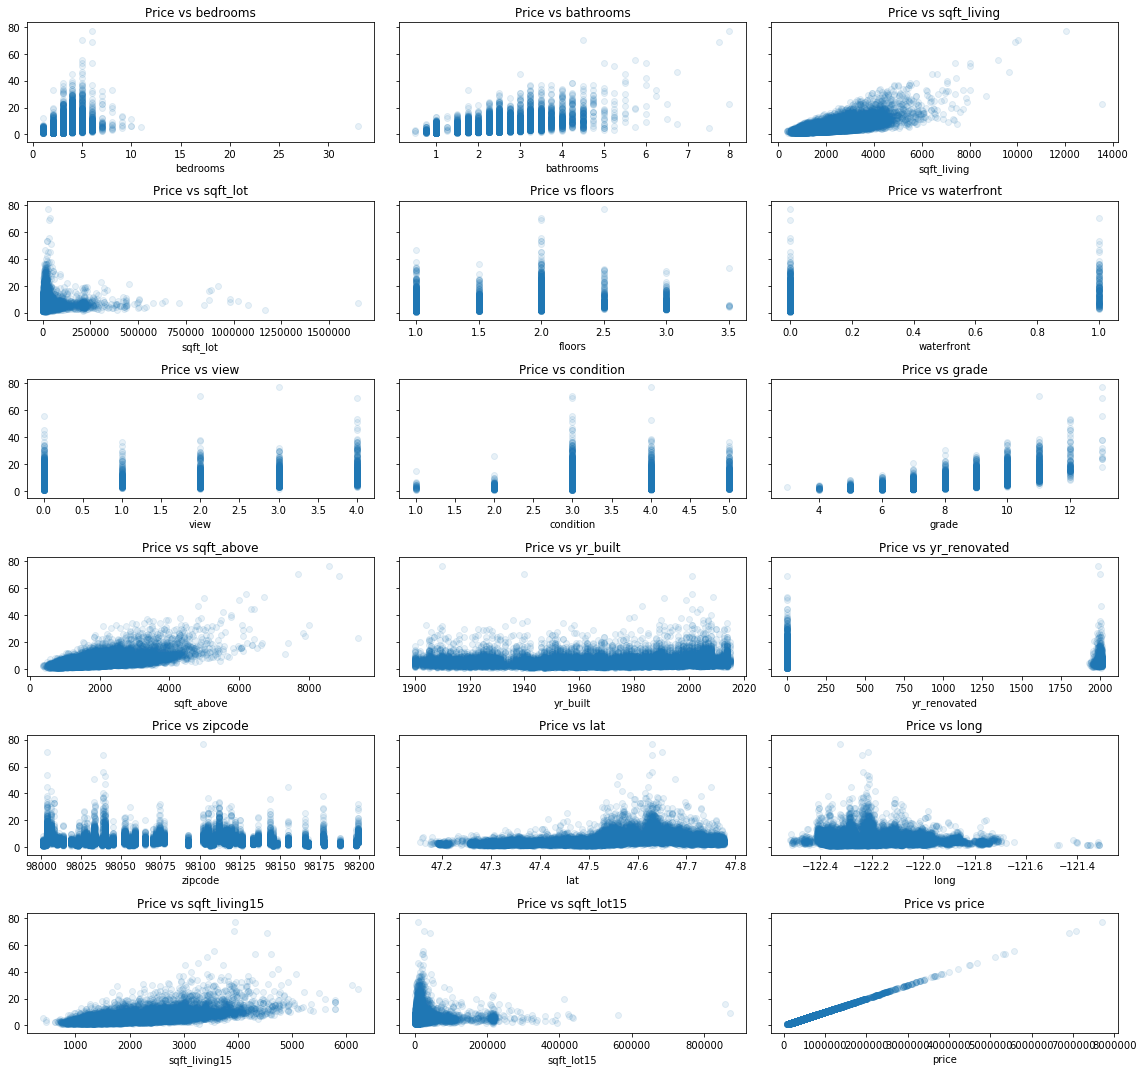

In [13]:
# Copied this code from our group project and futzed it a little. Feel free to adjust as you like.

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price']/100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)  
fig.tight_layout()

In [14]:
#sqft_living appears to be normally distributed.  And it looks promising with just a few outliers that we can clean up.

(18.5, -0.5)

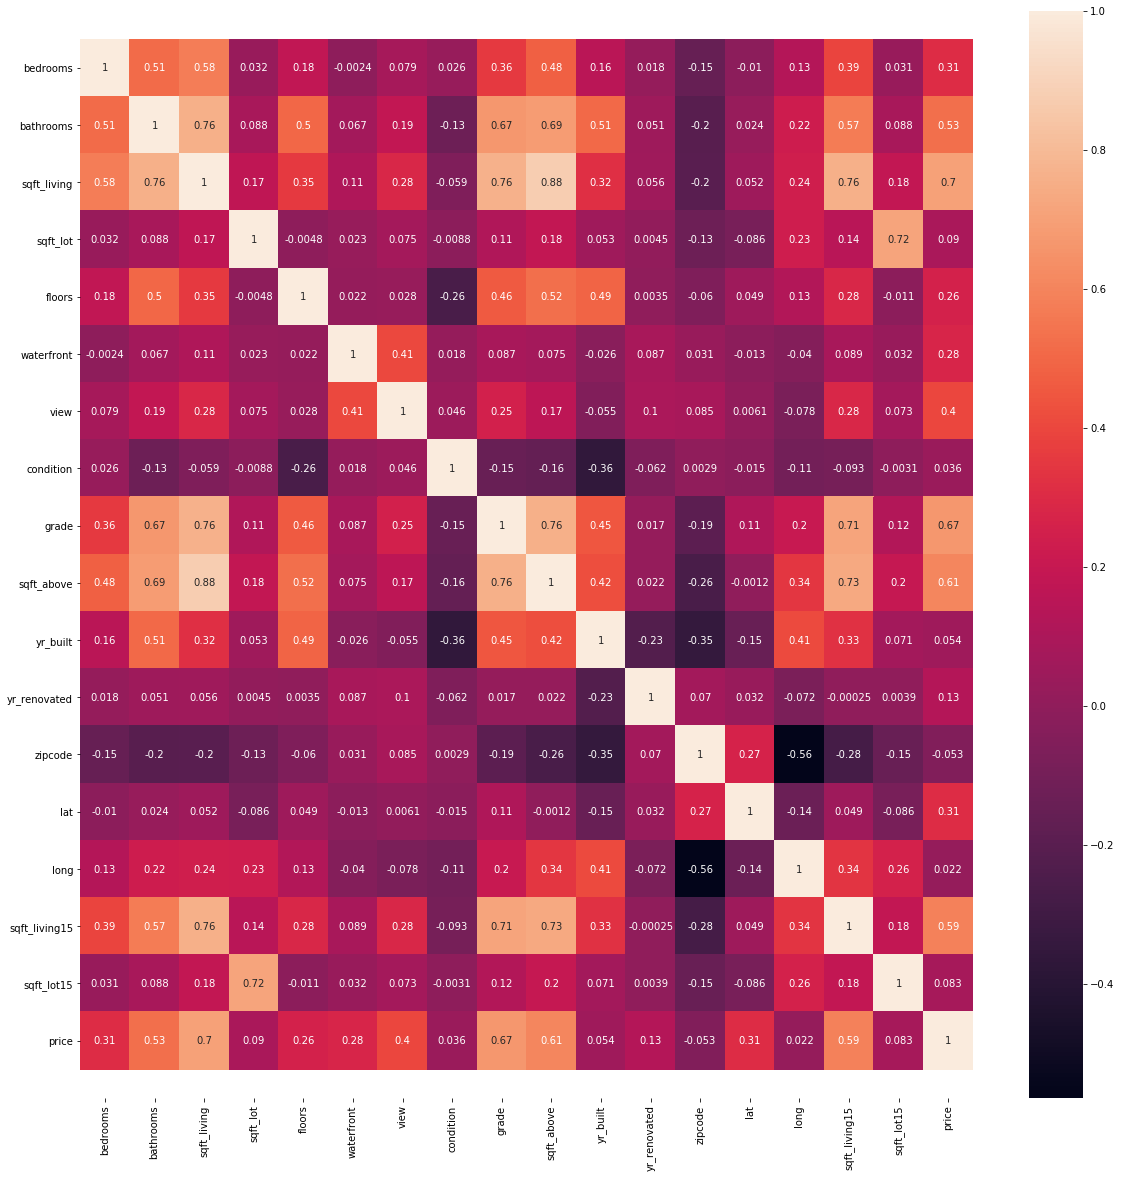

In [15]:
# Correlation heatmap! Don't know why it cuts off at top or bottom. Getting to be my bedtime or I'd look into it. Not super important right now.
#cb-this is a known problem per internet search-recommendation was to revert back to earlier version, but I found a fix for now.
#I put out bottom and top limits manually.
plt.figure(figsize=(20,20))
#sns.heatmap(data.corr(), annot=True)
df_corr = data.corr()
ax = sns.heatmap(df_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top -1)

In [16]:
#sqft above and sqft liv are highly correlated.  Since the sqft living appears to fit the baseline model better with fewer outliers, we will select it as our feature for our next iteration ((assuming Tim is good with this decision).

In [17]:
###############################################################################
### BELOW THIS IS JUST ME EXPERIMENTING
### LIKELY BROKEN OR USELESS CODE
### YOU CAN SAFELY IGNORE

In [18]:

#drop column that was strongly correlated to another feature
new_data2=new_data.drop(columns=['sqft_above'])
new_data2


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,3,7,1955,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,3,6,1933,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,2009,98103,47.6993,-122.346,1530,1509,360000.0
21593,4,2.50,2310,5813,2.0,3,8,2014,98146,47.5107,-122.362,1830,7200,400000.0
21594,2,0.75,1020,1350,2.0,3,7,2009,98144,47.5944,-122.299,1020,2007,402101.0
21595,3,2.50,1600,2388,2.0,3,8,2004,98027,47.5345,-122.069,1410,1287,400000.0


In [19]:
#Start working on dummy variables
new_data2['floors'].nunique()

6

In [20]:
floors= ['1', '1.5', '2', '2.5', '3', '3.5']
floors_series = pd.Series(floors)

In [21]:
cat_floors = floors_series.astype('category')
cat_floors

0      1
1    1.5
2      2
3    2.5
4      3
5    3.5
dtype: category
Categories (6, object): [1, 1.5, 2, 2.5, 3, 3.5]

In [22]:
pd.get_dummies(cat_floors)

,1,1.5,2,2.5,3,3.5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [23]:
trap_df = pd.get_dummies(cat_floors)
trap_df

,1,1.5,2,2.5,3,3.5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [24]:
#avoid the dummy trap by dropping one of the dummy variables
pd.get_dummies(cat_floors,drop_first=True)


,1.5,2,2.5,3,3.5
0,0,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,0,0,1


In [25]:
bed_dummies = pd.get_dummies(new_data2['bedrooms'], prefix='bed',drop_first=True)
bath_dummies = pd.get_dummies(new_data2['bathrooms'], prefix='bath',drop_first=True)
cond_dummies = pd.get_dummies(new_data2['condition'], prefix='cond',drop_first=True)
grad_dummies = pd.get_dummies(new_data2['grade'], prefix='grad',drop_first=True)

In [27]:
new_data2 = new_data2.drop(['bedrooms'],axis=1)

In [28]:
new_data2 = pd.concat([new_data2,bed_dummies],axis=1)
new_data2.head()

,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,...,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33
0,1.00,1180,5650,1.0,3,7,1955,98178,47.5112,-122.257,...,1,0,0,0,0,0,0,0,0,0
1,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,...,1,0,0,0,0,0,0,0,0,0
2,1.00,770,10000,1.0,3,6,1933,98028,47.7379,-122.233,...,0,0,0,0,0,0,0,0,0,0
3,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,...,0,1,0,0,0,0,0,0,0,0
4,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,...,1,0,0,0,0,0,0,0,0,0


In [29]:
new_data2 = new_data2.drop(['bathrooms', 'condition', 'grade'],axis=1)

In [30]:
#Wow - we have a ton more columns now!
new_data2 = pd.concat([new_data2,bath_dummies, cond_dummies, grad_dummies],axis=1)
new_data2.head()

,sqft_living,sqft_lot,floors,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,...,grad_4,grad_5,grad_6,grad_7,grad_8,grad_9,grad_10,grad_11,grad_12,grad_13
0,1180,5650,1.0,1955,98178,47.5112,-122.257,1340,5650,221900.0,...,0,0,0,1,0,0,0,0,0,0
1,2570,7242,2.0,1951,98125,47.7210,-122.319,1690,7639,538000.0,...,0,0,0,1,0,0,0,0,0,0
2,770,10000,1.0,1933,98028,47.7379,-122.233,2720,8062,180000.0,...,0,0,1,0,0,0,0,0,0,0
3,1960,5000,1.0,1965,98136,47.5208,-122.393,1360,5000,604000.0,...,0,0,0,1,0,0,0,0,0,0
4,1680,8080,1.0,1987,98074,47.6168,-122.045,1800,7503,510000.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Train-Test-Split here - I'm not sure about the random_state=42, so we need to research that one
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

In [ ]:
# or we can use the sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

SeattleHousingData - Regression Analysis and Diagnostics for price~bedrooms
--------------------------------------------------------------------------------------


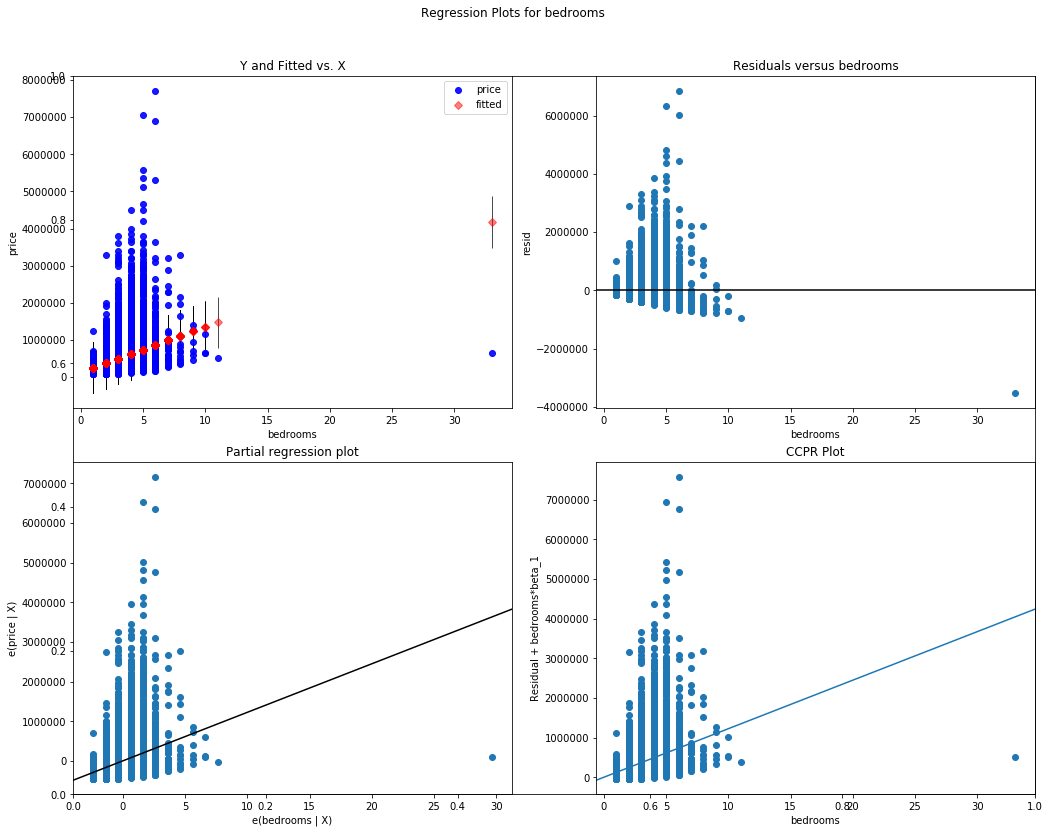

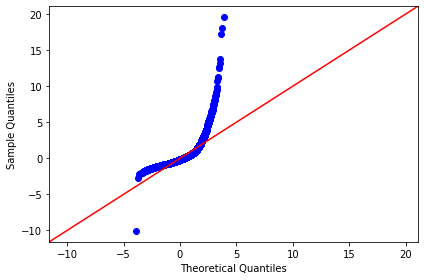

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~bathrooms
--------------------------------------------------------------------------------------


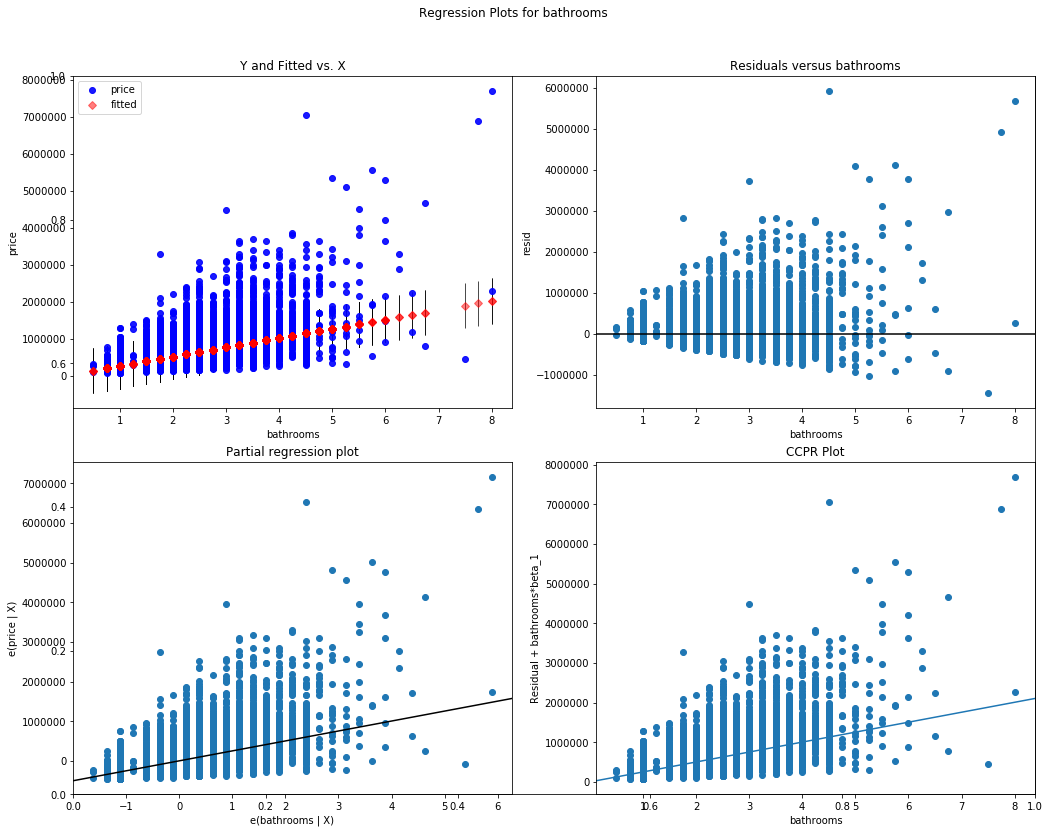

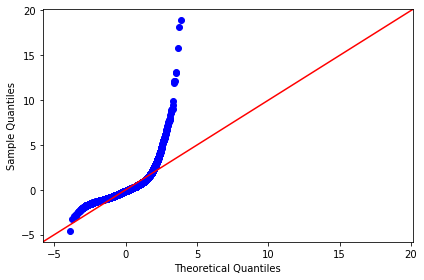

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~sqft_living
--------------------------------------------------------------------------------------


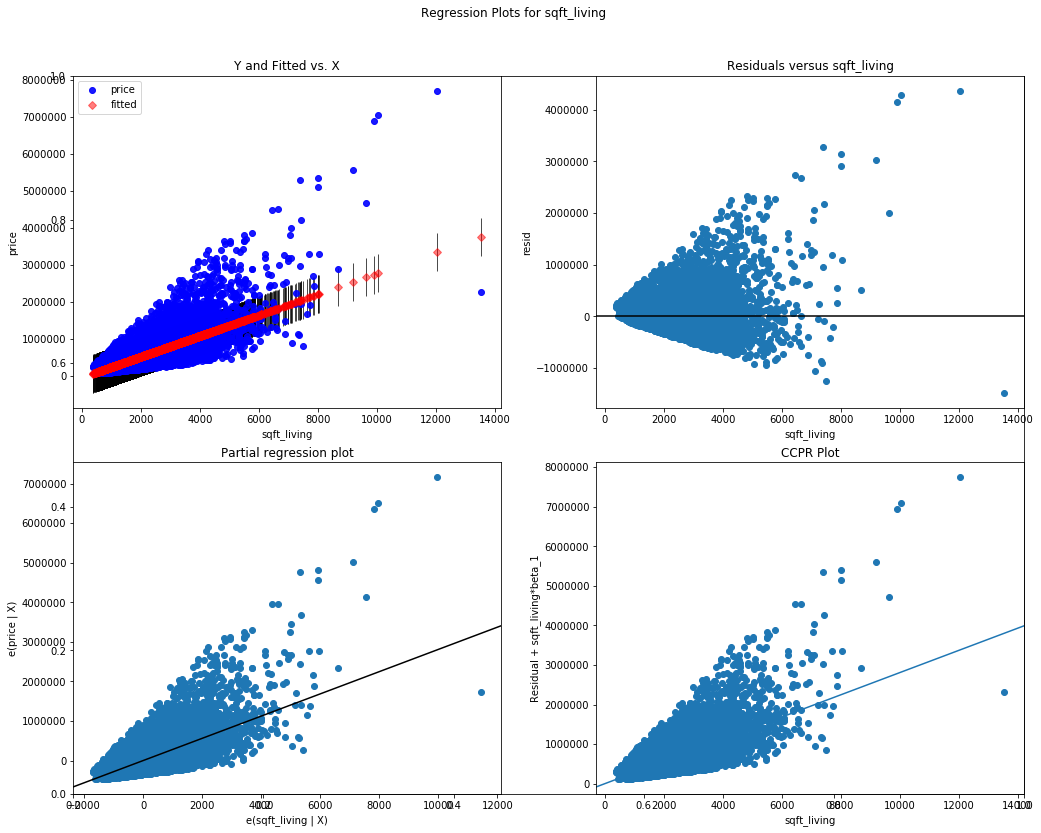

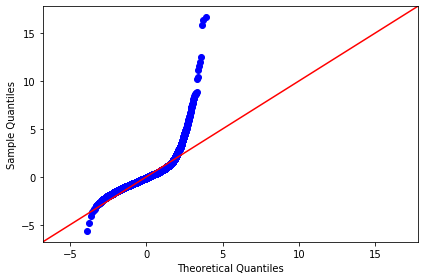

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~sqft_lot
--------------------------------------------------------------------------------------


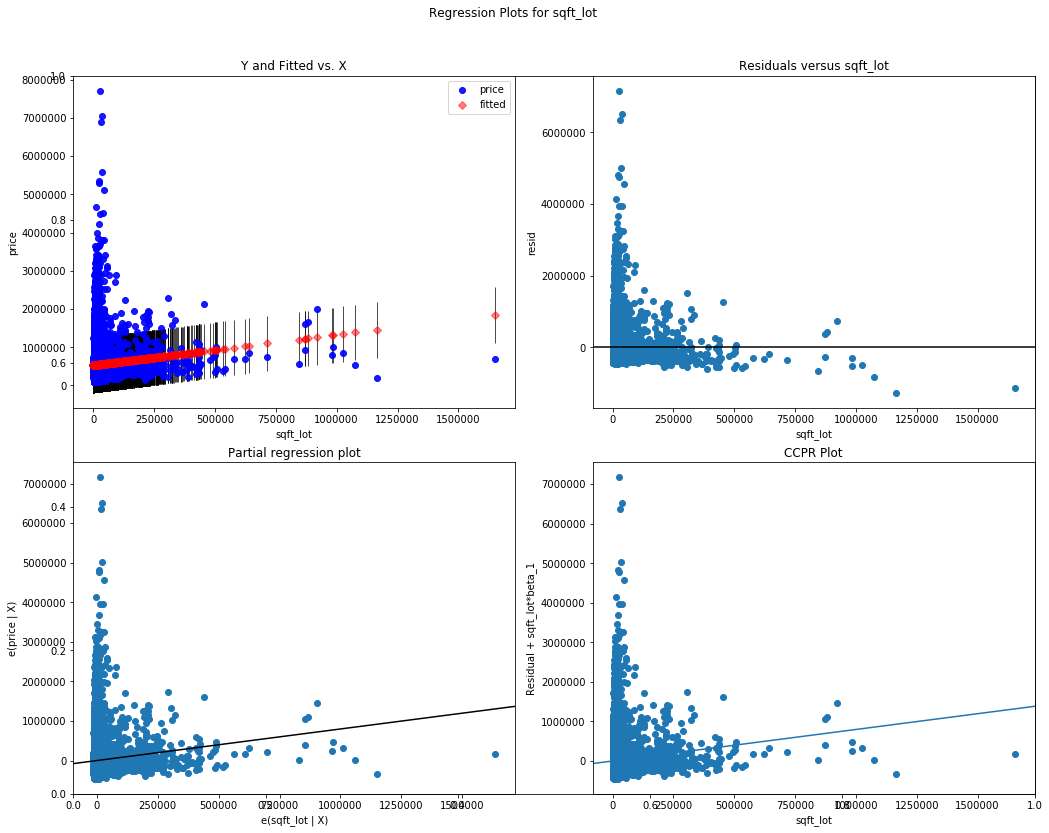

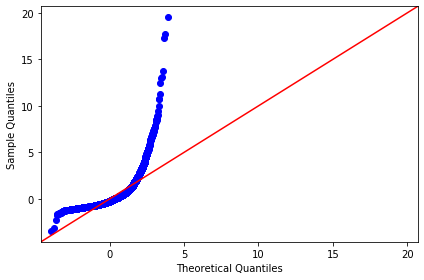

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~floors
--------------------------------------------------------------------------------------


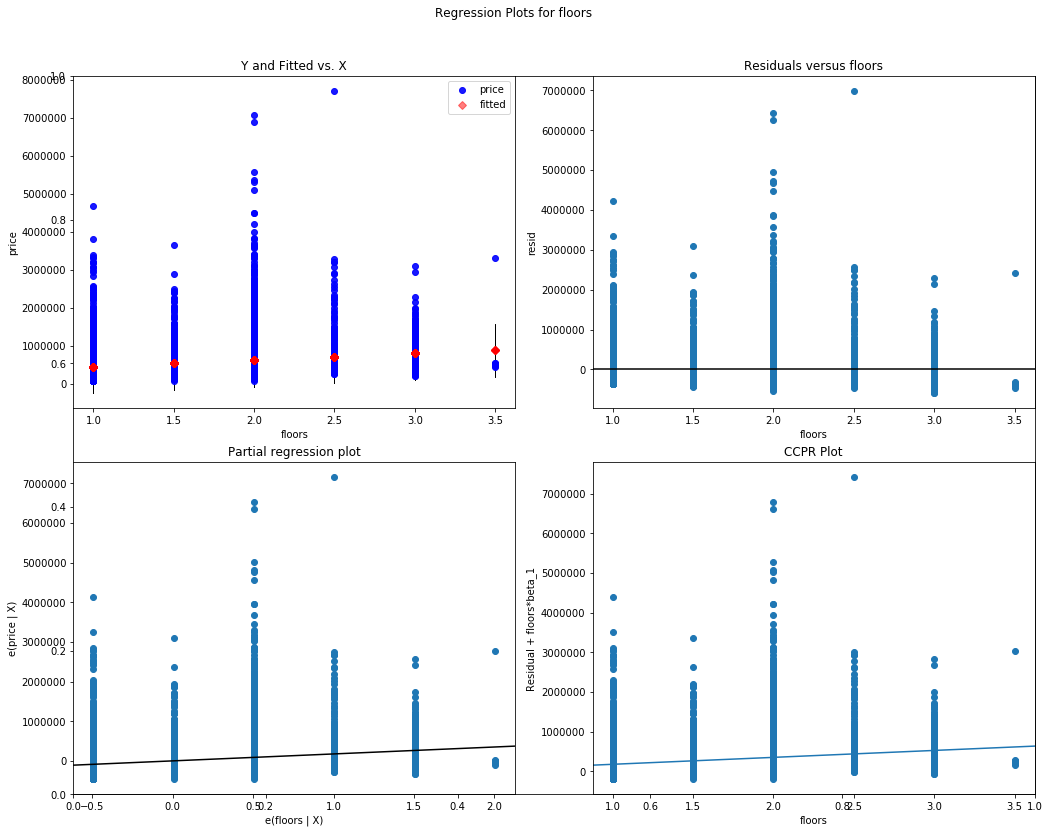

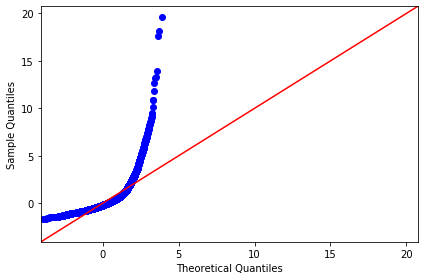

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~waterfront
--------------------------------------------------------------------------------------


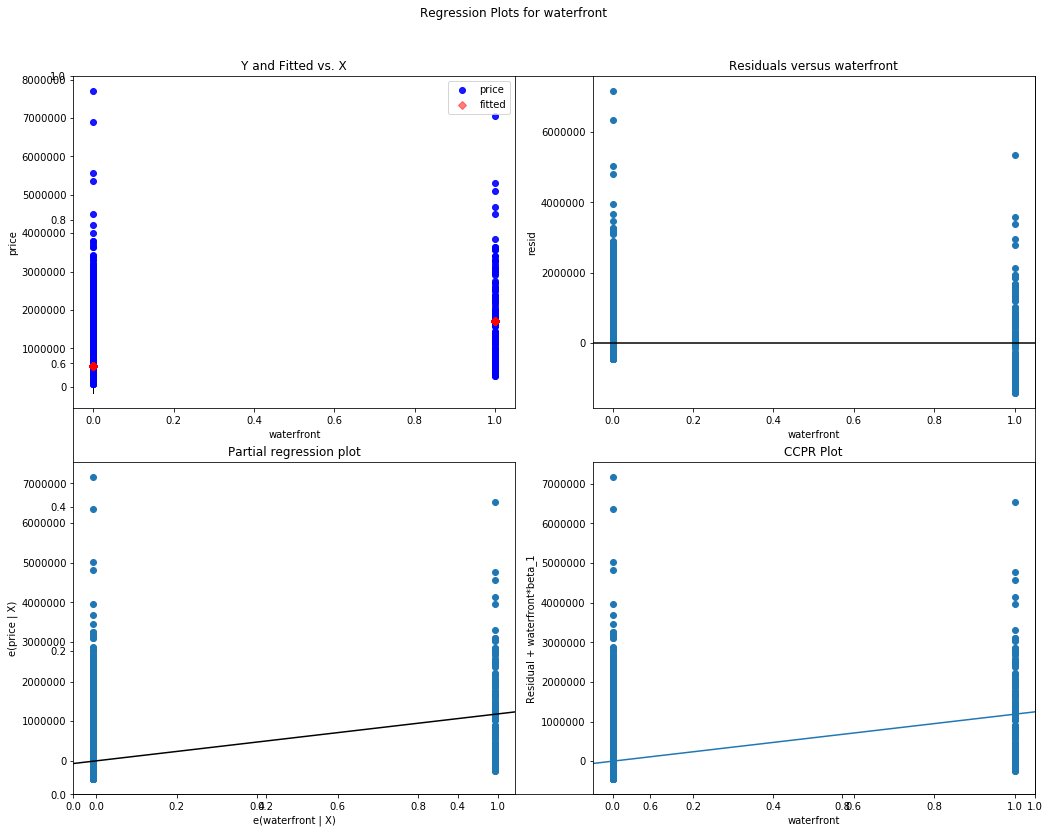

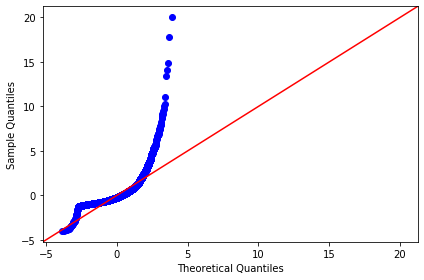

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~view
--------------------------------------------------------------------------------------


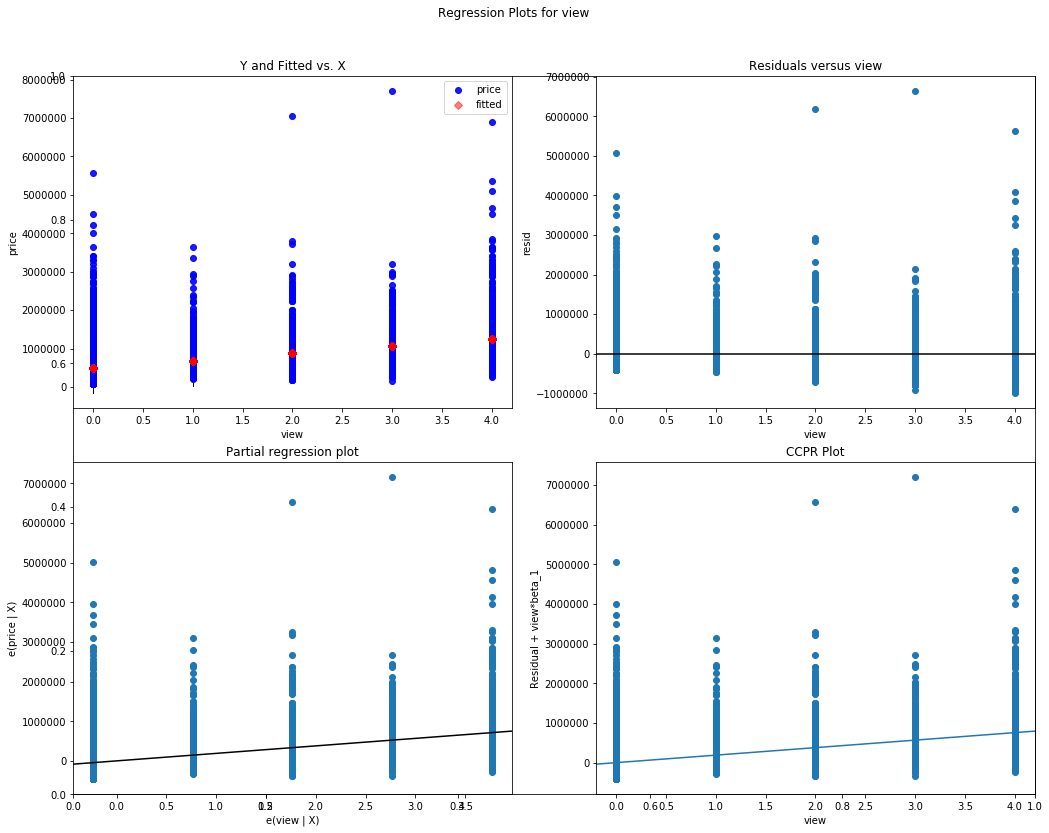

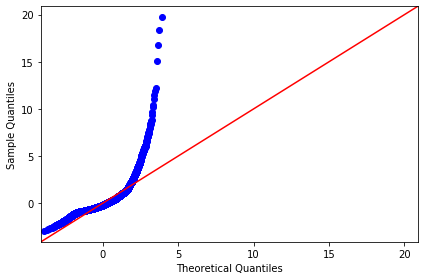

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~condition
--------------------------------------------------------------------------------------


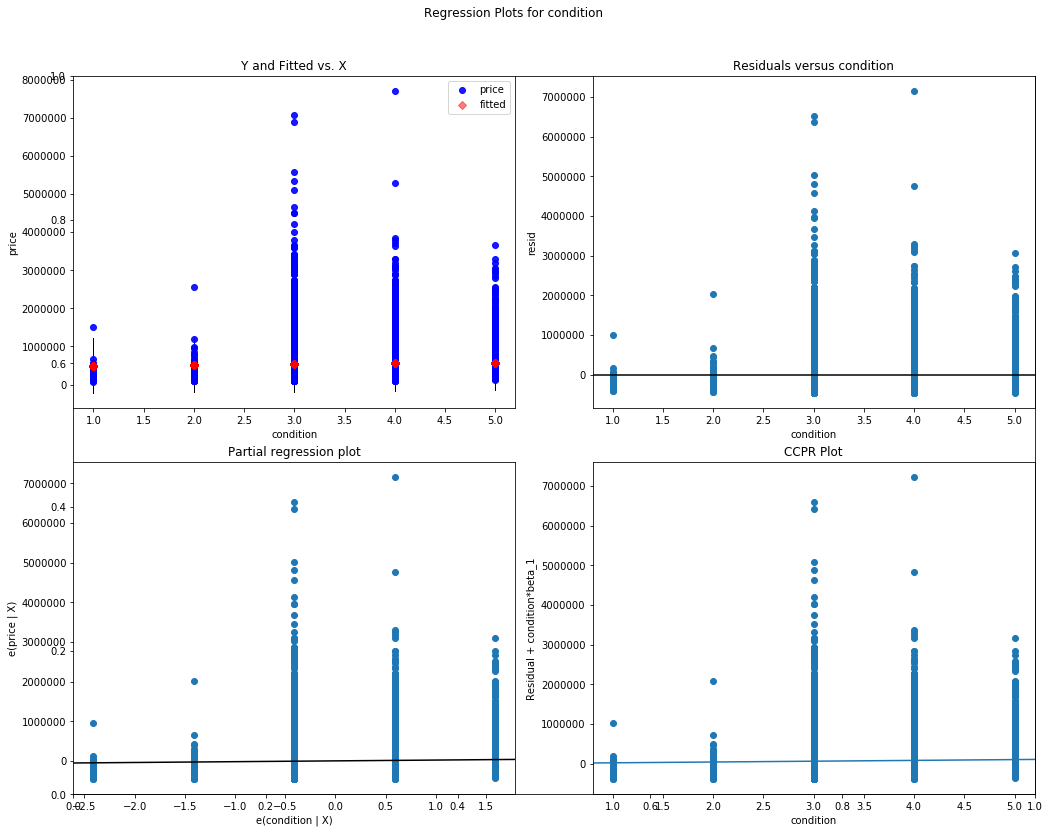

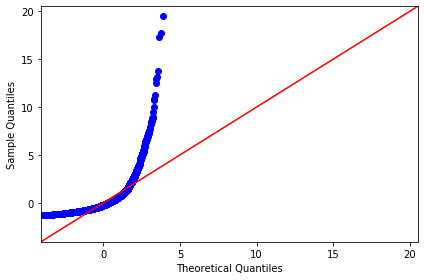

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~grade
--------------------------------------------------------------------------------------


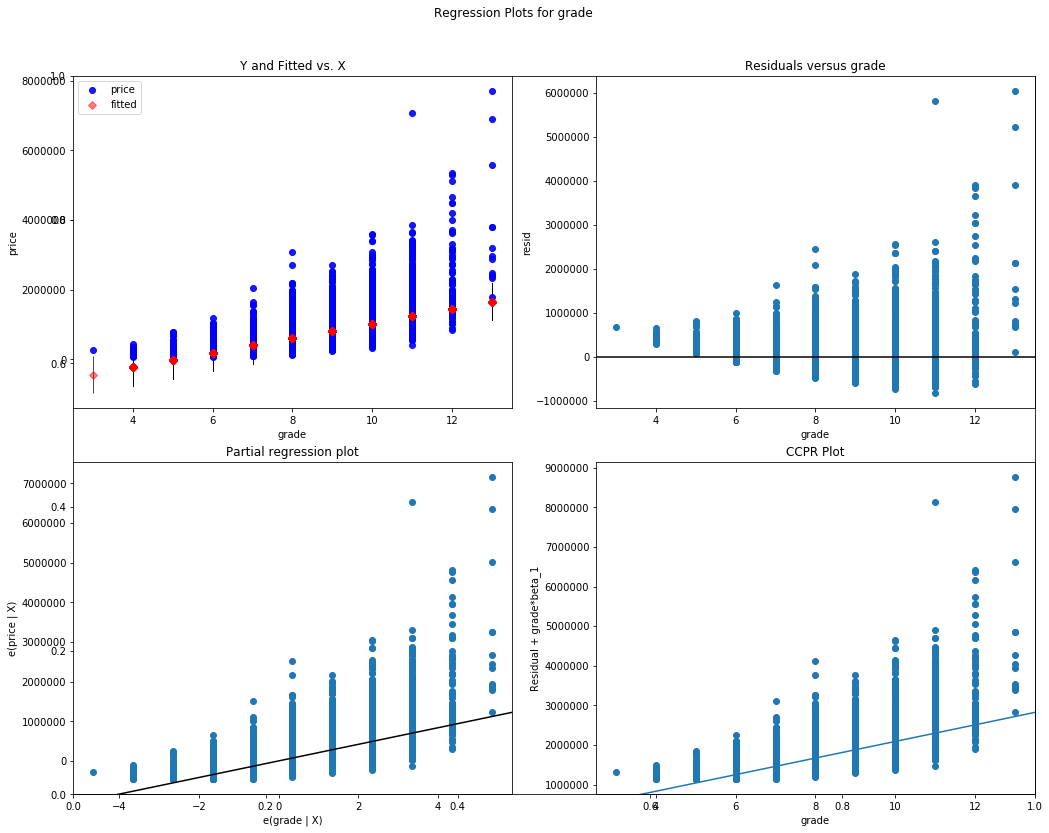

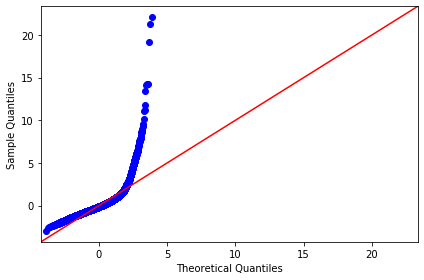

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~sqft_above
--------------------------------------------------------------------------------------


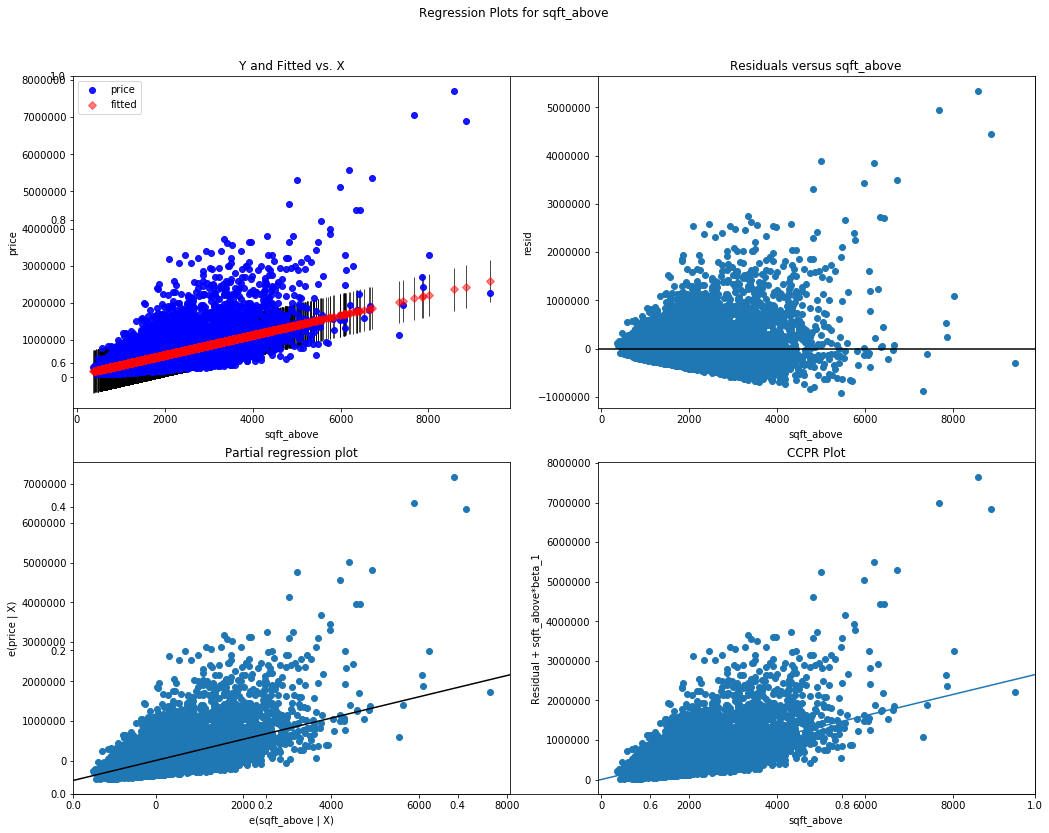

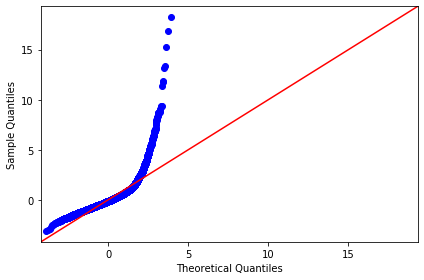

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~yr_built
--------------------------------------------------------------------------------------


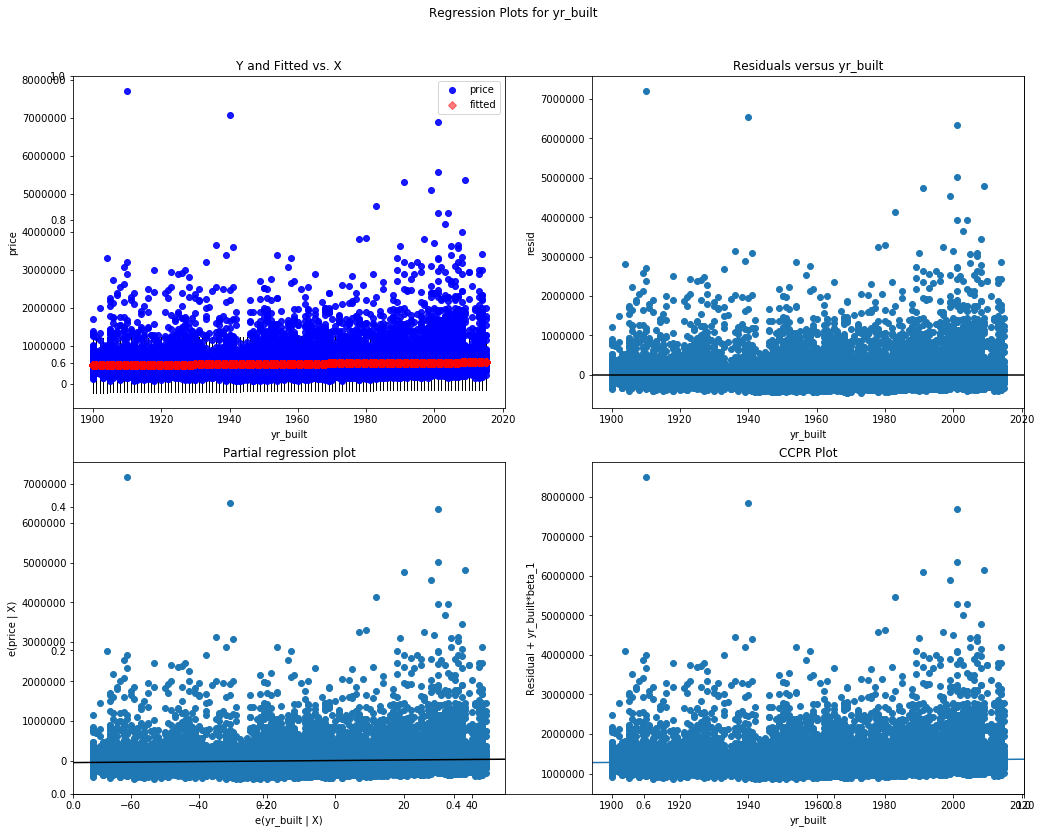

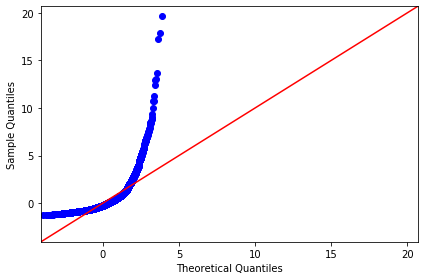

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~yr_renovated
--------------------------------------------------------------------------------------


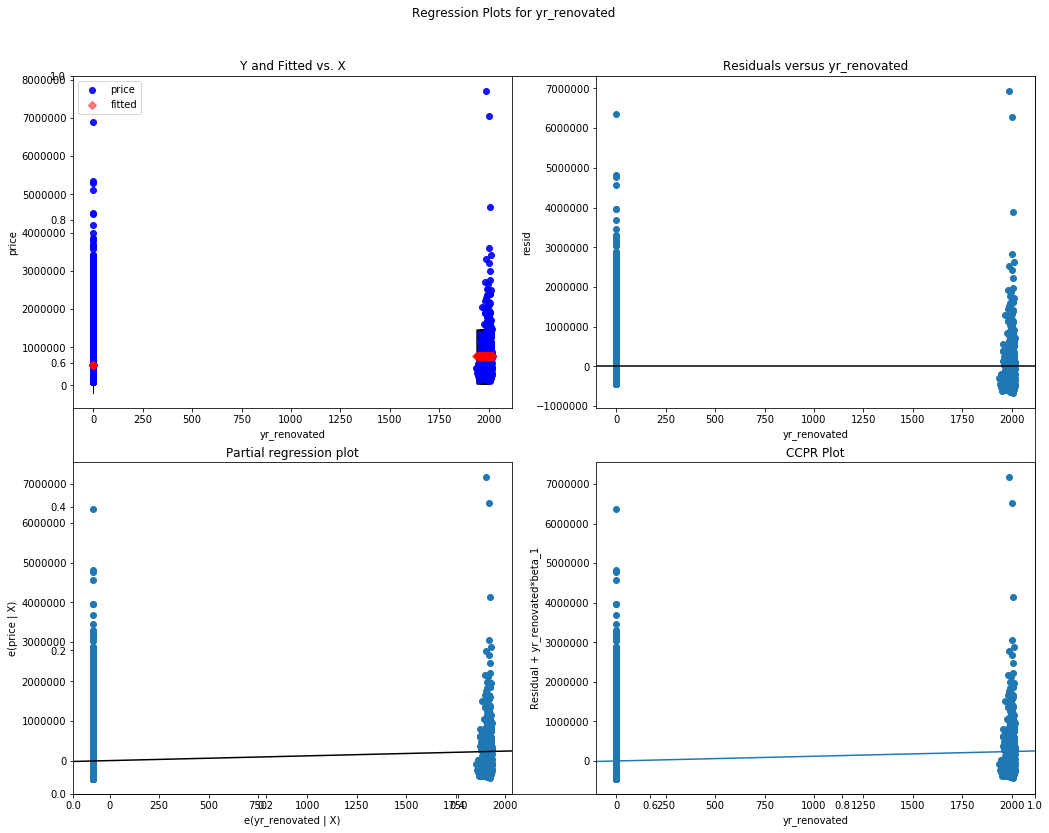

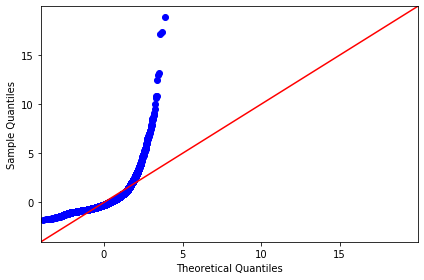

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~zipcode
--------------------------------------------------------------------------------------


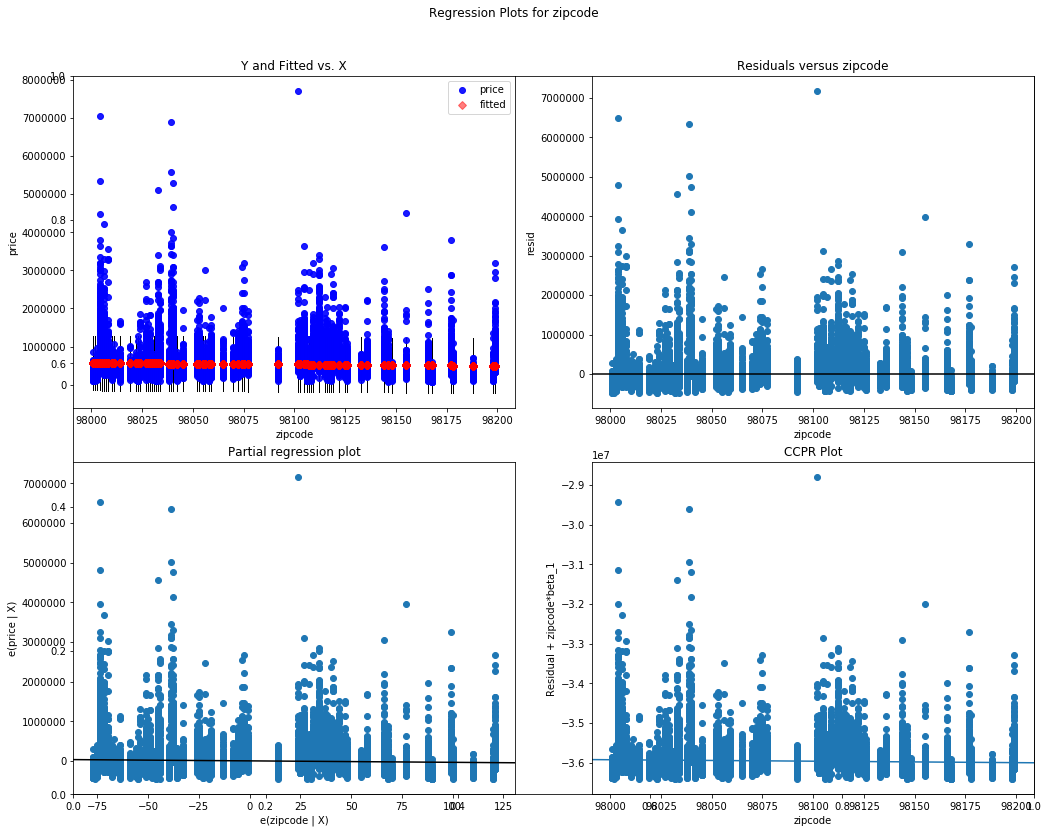

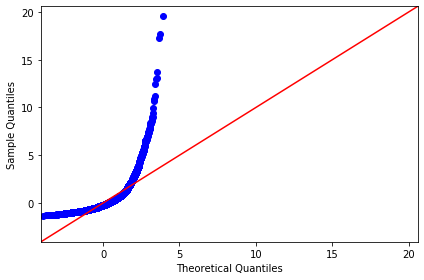

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~lat
--------------------------------------------------------------------------------------


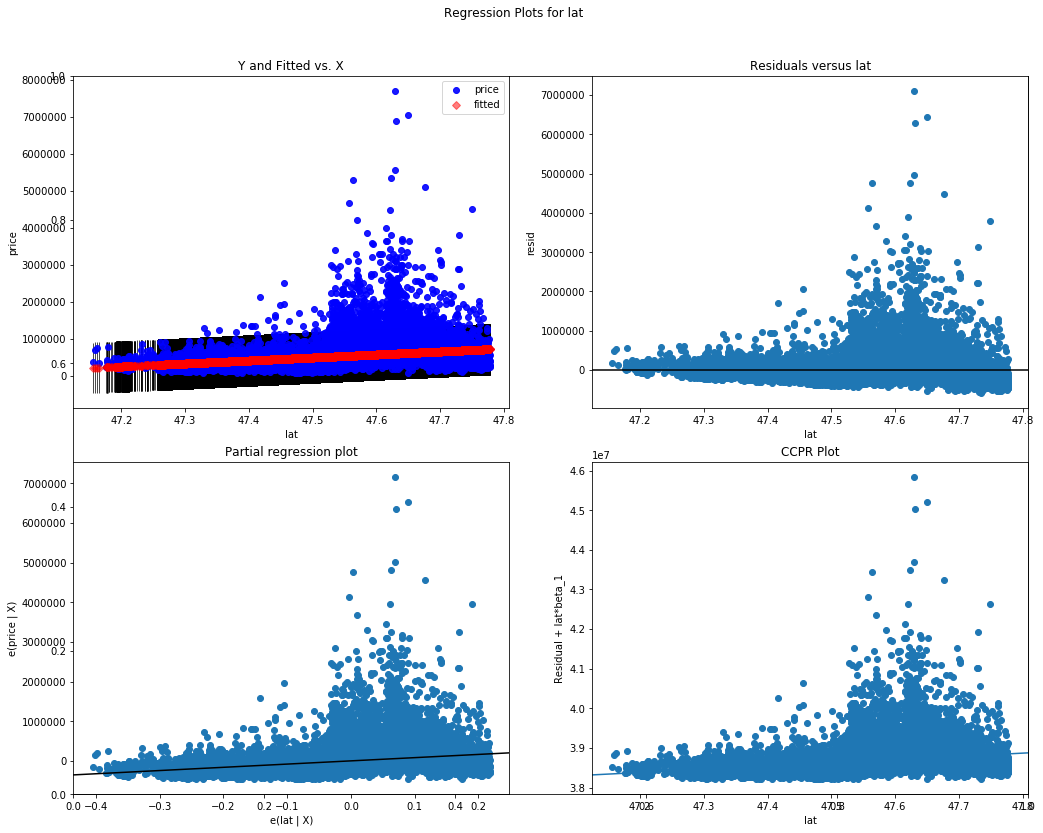

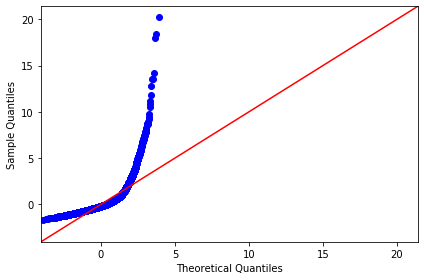

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~long
--------------------------------------------------------------------------------------


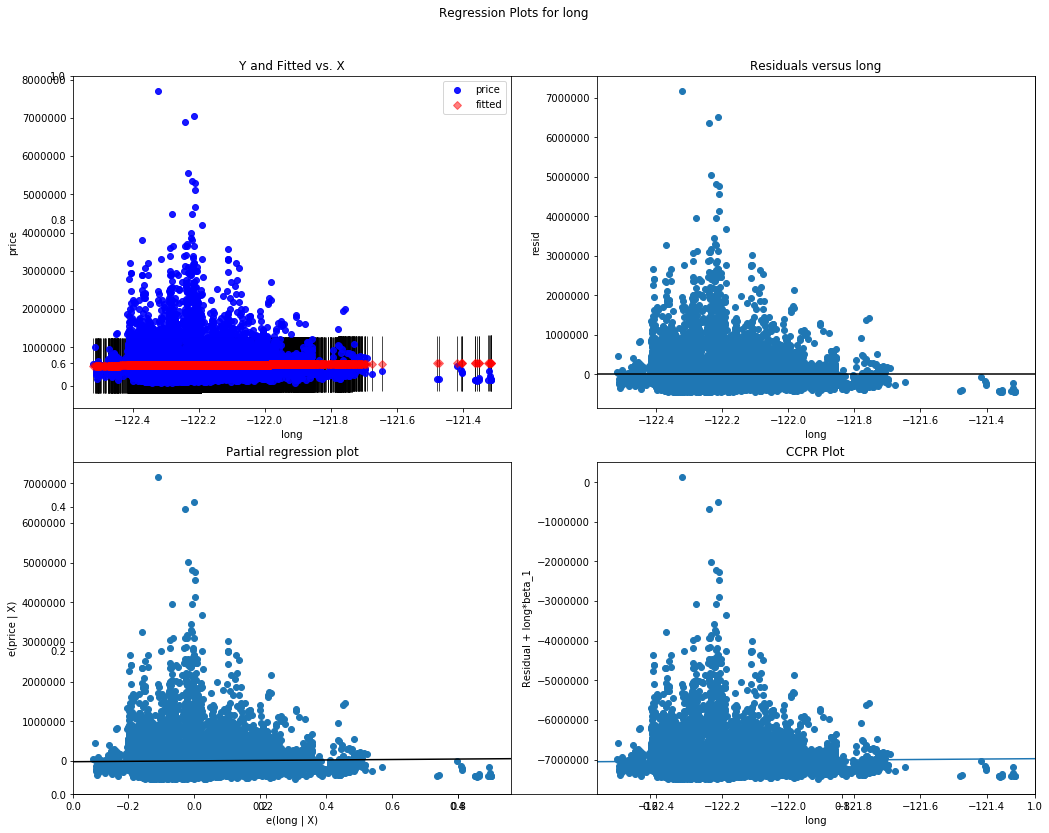

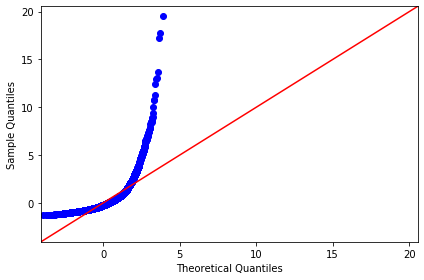

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~sqft_living15
--------------------------------------------------------------------------------------


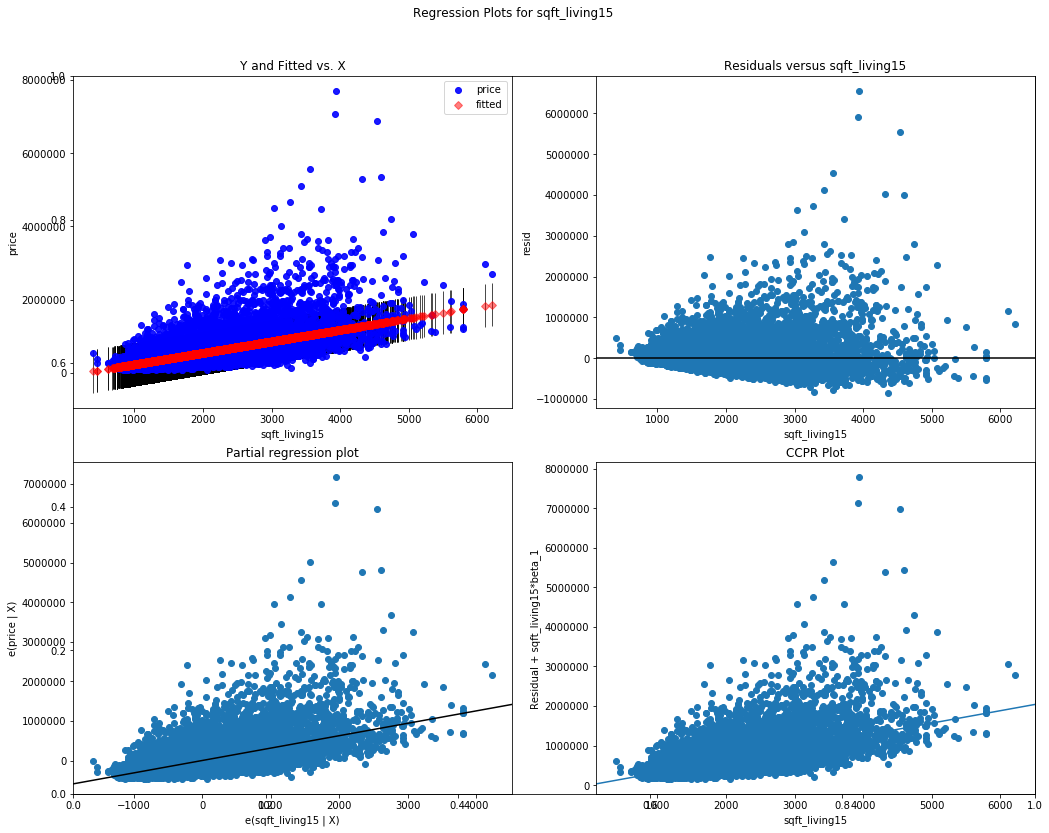

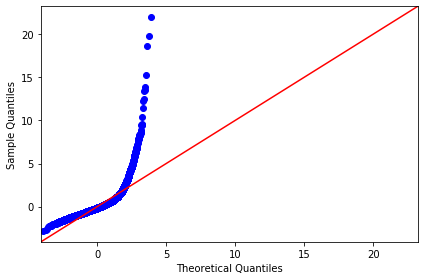

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~sqft_lot15
--------------------------------------------------------------------------------------


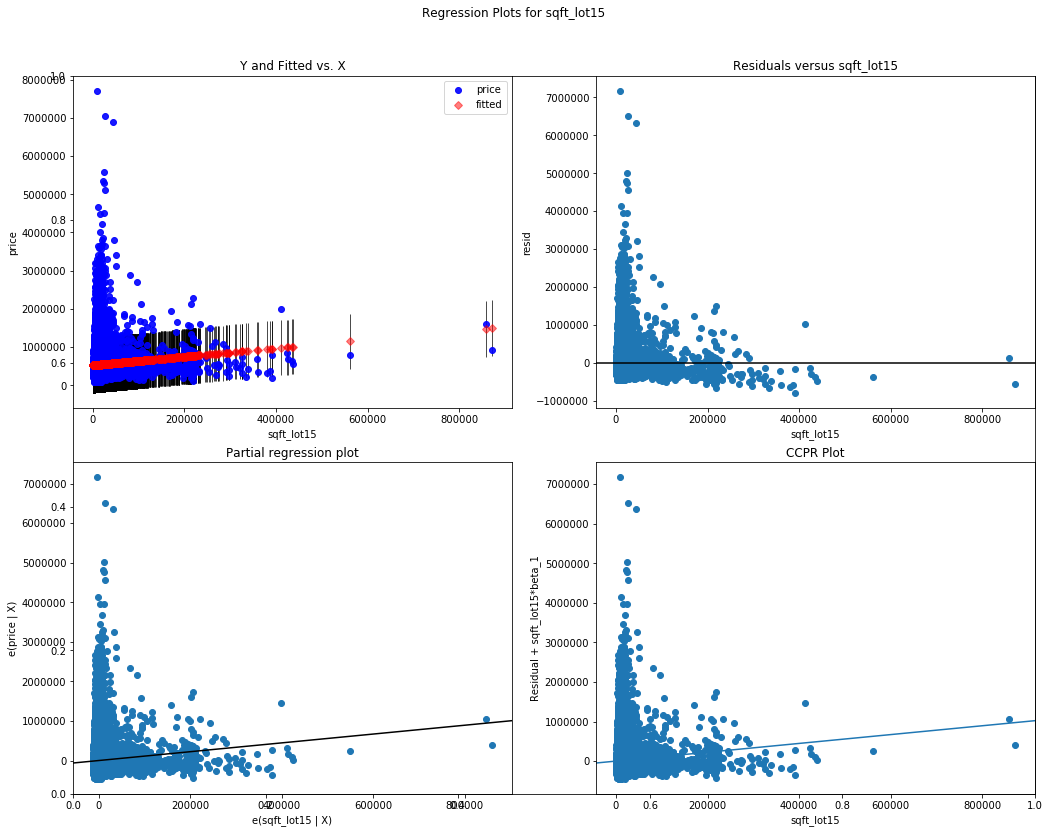

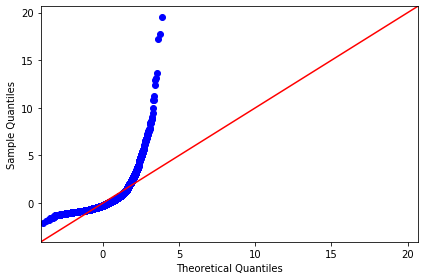

Press Enter to continue...
SeattleHousingData - Regression Analysis and Diagnostics for price~price
--------------------------------------------------------------------------------------


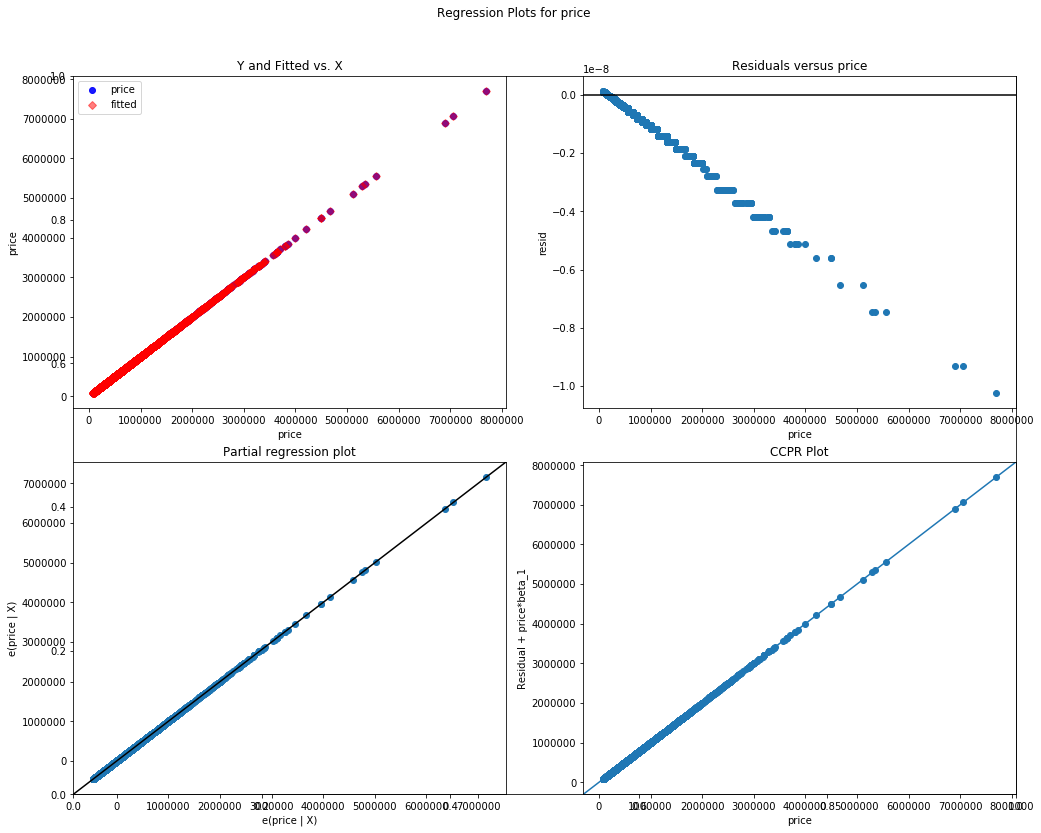

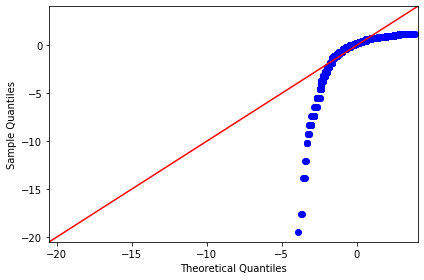

Press Enter to continue...


In [31]:
#Hi Tim!  I'm starting my convo here.  Also, I've added some comments throughout as Yish mention in the project documentation
#to include questions and thoughts about our decisions throughout the notebook, #so trying to check off all the asks on the list
#Here is a linear regression model we can use as our baseline.  It's not in the right spot, but we can figure that out after we
#clean up the notebook a bit.  It needs to go after the train-test-split

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

results = []
for idx, column in enumerate(data.columns):
    print (f"SeattleHousingData - Regression Analysis and Diagnostics for price~{column}")
    print ("--------------------------------------------------------------------------------------")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
  
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

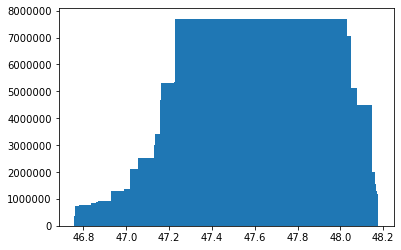

In [32]:
plt.bar(data['lat'], data['price']);

In [33]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'price'],
      dtype='object')

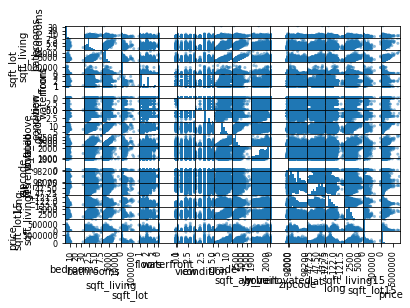

In [34]:
pd.plotting.scatter_matrix(data);

In [35]:
def logcompare(data=None):
    fig, axs = plt.subplots(nrows=len(data.columns), ncols=2, sharey=True, figsize = (20, (len(data.columns)*2)))
    logcol = []
    column=0
    for n, col in enumerate(data.columns):
        if column==2:
            break
        logcol.append(col)
        plt.title(col)
        axs[n, column].bar(data[col], data['price'])
        column += 1
    # for xcol, ax in zip([data.columns, logcol], axs):
    #     data.hist(x=xcol, y='price', ax=ax, alpha=0.4, color='b')

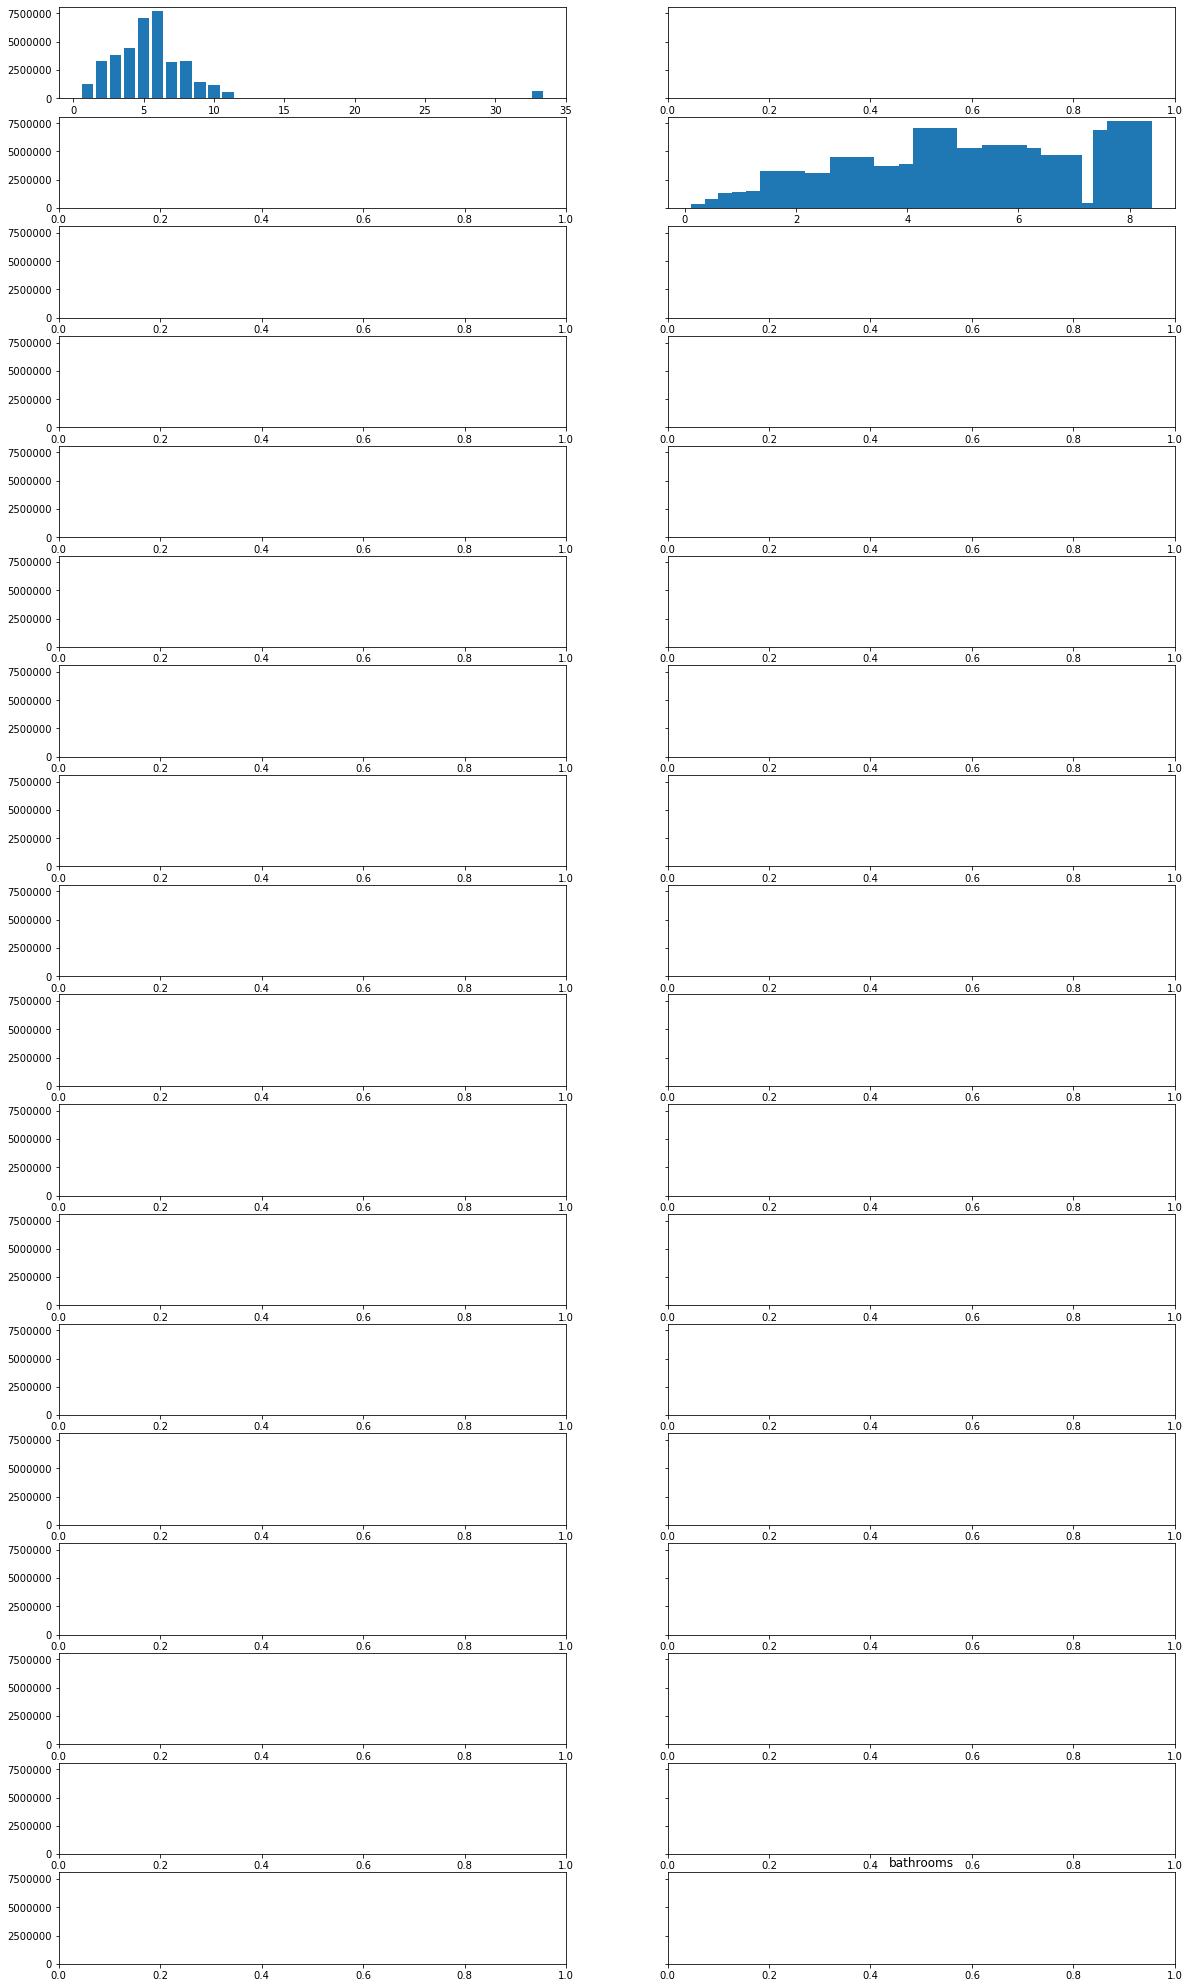

In [36]:
logcompare(data=data)